In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### User input parameters
- Number of kids:		    **range: [n_lower,n_upper]**
- Number of schools:		**default 1 for now**
- Bridges, tunnels, delays:	**True/False**

In [2]:
# min/max number of students
n_students_lower, n_students_upper = 10, 15

# number of schools
n_schools = 1

# whether to generate routes with bridges or tunnels
has_bridge = False
has_tunnel = False

# Randomly draw route-wide variables
- number of students
- school code + start/end time
https://nces.ed.gov/pubs2020/2020006/images/2020006_1.png

### n_students

In [17]:
#  functions to reverse-engineer the distribution for number of students from the given student counts

def smooth_dist(n_student_freqs, k):
    """
    Add-k smoothing, multiply percentages by number of kids (30000) in original hist
    Add-k formula: P(n) = (count(n) + k) / (totalcount + kV), where V = number of buckets
    
    n_student_freqs: dict of {range (string) : probability (float)}
    k: int
    """
    total = 30000
    V = len(n_student_freqs.values())
    smoothed_values = [((n*total)+k)/(total+k*V) for n in n_student_freqs.values()]
    smoothed = dict(zip(list(n_student_freqs.keys()), smoothed_values))
    return smoothed

def generate_n_students(freqs, k):
    """
    Given freqs, choose a bucket of n-values according to probs.
    Uniformly add 0 or 1 to the start of the chosen range and return the result.
    
    freqs: {range (string) : probability (float)}, use smoothed freqs
    """
    smoothed = smooth_dist(freqs, k)
    choices = list(smoothed.keys())
    probs = list(smoothed.values())
    n_range = np.random.choice(a=choices, p=probs)
    n = int(n_range.split(',')[0])
    delta = np.random.randint(0, 2)
    return n + delta


In [18]:
# define the frequency distribution and smooth by k
n_student_freqs = {'0,1': 0,
                   '2,3': .035,
                   '4,5': .10,
                   '6,7': .15,
                   '8,9': .225,
                   '10,11': .2425,
                   '12,13': .1525,
                   '14,15': .055,
                   '16,17': .02,
                   '18,19': .015,
                   '20,21': 0.005,
                   '22,23': 0}

# generate n_students
k = 5
n_students = generate_n_students(n_student_freqs, k)
print('n_students:', n_students)

n_students: 16


/var/folders/d5/7kz6dchj5jx4f5bym9l_5y9c0000gn/T/ipykernel_6241/2658237937.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(list(n_student_freqs.keys()), rotation=45);
/var/folders/d5/7kz6dchj5jx4f5bym9l_5y9c0000gn/T/ipykernel_6241/2658237937.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(list(n_student_freqs.keys()), rotation=45);


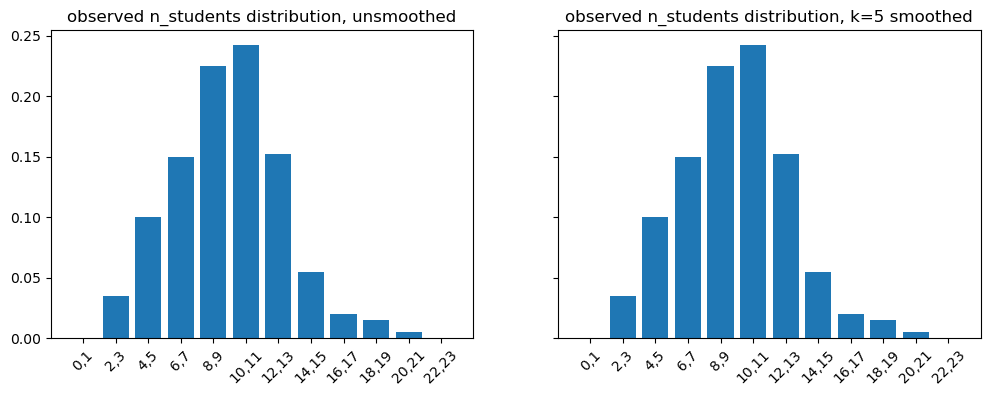

In [19]:
# display unsmoothed and smoothed distribution
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(12, 4))

ax1.bar(height=n_student_freqs.values(), x=list(n_student_freqs.keys()))
ax1.set_title('observed n_students distribution, unsmoothed')
ax1.set_xticklabels(list(n_student_freqs.keys()), rotation=45);

ax2.bar(height=list(smooth_dist(n_student_freqs, k).values()), x=list(n_student_freqs.keys()))
ax2.set_title(f'observed n_students distribution, k={k} smoothed')
ax2.set_xticklabels(list(n_student_freqs.keys()), rotation=45);

### start_time

In [20]:
# estimate start time distribution by averaging "City", "200-499 enrollment",  and "500-799 enrollment" from chart above
a_city = [10, 25, 39, 26]
a_200 = [7, 35, 42, 17]
a_500 = [7, 41, 44, 9]
total = sum(a_city) + sum(a_200) + sum(a_500)
p_avg = [sum(times)/total for times in zip(a_city, a_200, a_500)]
t_choices = ['7:00', '7:30', '8:00', '8:30']

# randomly select a time from the list of choices
t = np.random.choice(a=t_choices, p=p_avg)

# uniformly choose a multiple of 5 between 0 and 25 minutes to add to the chosen time increment
m = 5 * np.random.randint(0, 6)
start_time = t[0:2] + str(int(t[2:]) + m).rjust(2, '0')
print('start_time:', start_time)

start_time: 7:35


### Randomly generate students